In [35]:
import pandas as pd
df = pd.read_csv('database/Accounts.csv')
df.count(axis=0)

AccountId    60
Name         60
Age          60
City         56
State        56
Pincode      56
dtype: int64

In [36]:
import os

accounts_file = "database/Accounts.csv"
df_accounts = pd.read_csv(accounts_file)

print("Initial Data:")
print(df_accounts.head())

print("\nMissing Values Before Cleaning:")
print(df_accounts.isnull().sum())

df_accounts['Name'] = df_accounts['Name'].fillna('Unknown')

df_accounts['Age'] = df_accounts['Age'].fillna(df_accounts['Age'].median())
df_accounts['City'] = df_accounts['City'].fillna('Unknown')
df_accounts['State'] = df_accounts['State'].fillna('Unknown')
df_accounts['Pincode'] = df_accounts['Pincode'].fillna(0)

print("\nMissing Values After Cleaning:")
print(df_accounts.isnull().sum())

df_accounts.to_csv("database/accounts_cleaned.csv", index=False)
print("\nCleaned data saved to 'accounts_cleaned.csv'")


Initial Data:
            AccountId                     Name  Age  City        State  \
0  0012j00000GjoGnAAJ        Testt test Kumarr   29  Pune  Maharashtra   
1  0012j00000GmxLdAAJ  Testeshaan Testaggarwal   33  Pune  Maharashtra   
2  0018p0000054vjzAAA      Divyatest Test Test   33  Pune  Maharashtra   
3  0018p000004rhlqAAA         Test1 Test Test2   33  Pune  Maharashtra   
4  0018p00000552gZAAQ           Test Test Test   33  Pune  Maharashtra   

    Pincode  
0  411040.0  
1  411004.0  
2  411004.0  
3  411004.0  
4  411004.0  

Missing Values Before Cleaning:
AccountId    0
Name         0
Age          0
City         4
State        4
Pincode      4
dtype: int64

Missing Values After Cleaning:
AccountId    0
Name         0
Age          0
City         0
State        0
Pincode      0
dtype: int64

Cleaned data saved to 'accounts_cleaned.csv'



Summary Statistics:
                 AccountId            Name         Age  City        State  \
count                   60              60   60.000000    60           60   
unique                  60              47         NaN     7            4   
top     0012j00000GjoGnAAJ  Test Test Test         NaN  Pune  Maharashtra   
freq                     1               8         NaN    51           45   
mean                   NaN             NaN   35.000000   NaN          NaN   
std                    NaN             NaN   16.960572   NaN          NaN   
min                    NaN             NaN   21.000000   NaN          NaN   
25%                    NaN             NaN   33.000000   NaN          NaN   
50%                    NaN             NaN   33.000000   NaN          NaN   
75%                    NaN             NaN   33.000000   NaN          NaN   
max                    NaN             NaN  124.000000   NaN          NaN   

              Pincode  
count       60.000000  
unique

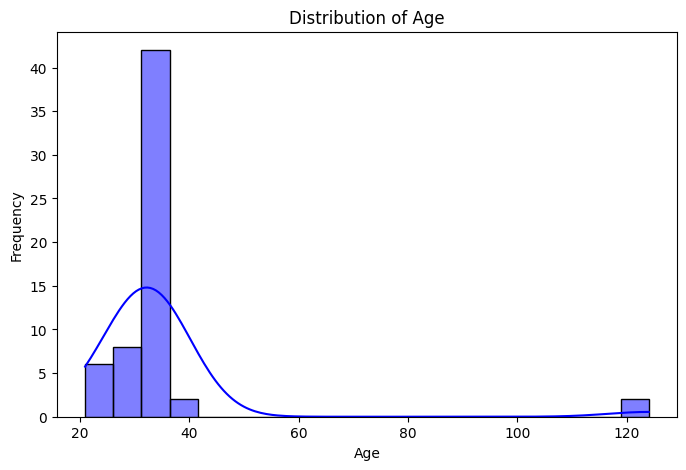

C:\Users\aafta\AppData\Local\Temp\ipykernel_14648\952975445.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


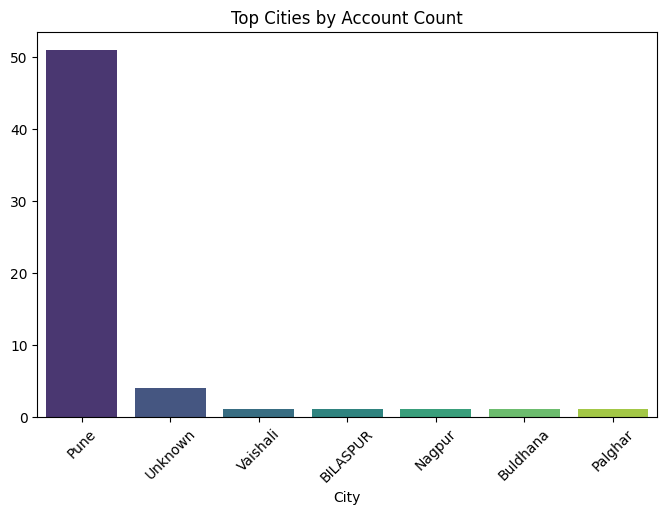

C:\Users\aafta\AppData\Local\Temp\ipykernel_14648\952975445.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')


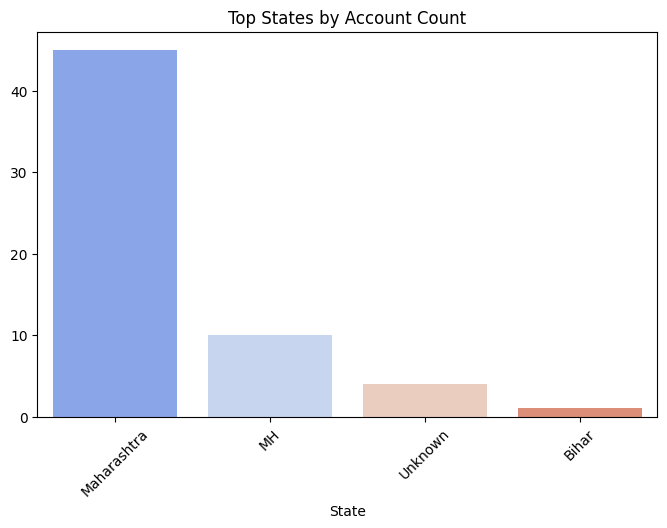

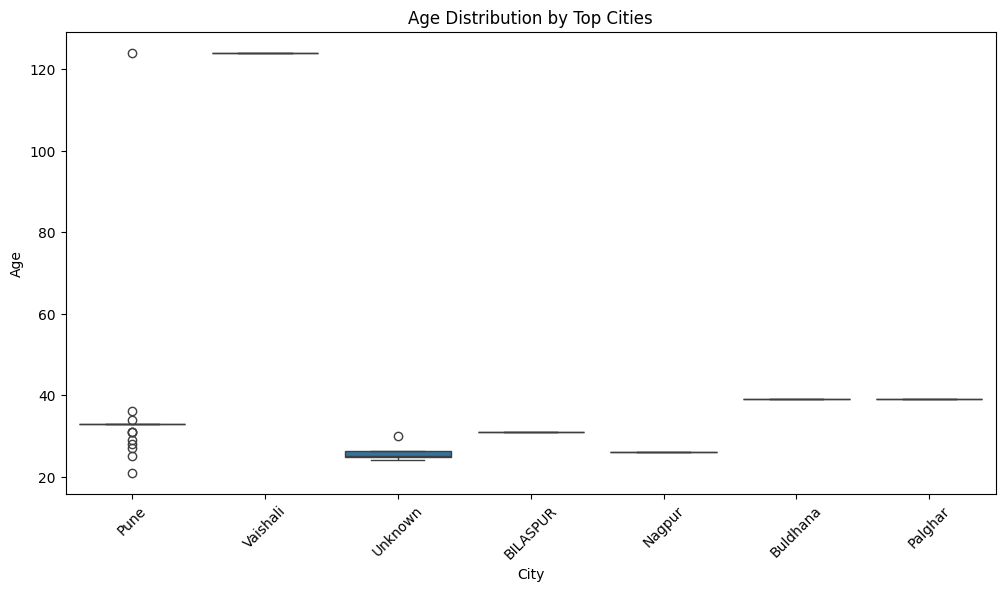

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nSummary Statistics:")
print(df_accounts.describe(include='all'))

# 1. Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df_accounts['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Top Cities by Count
top_cities = df_accounts['City'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top Cities by Account Count')
plt.xticks(rotation=45)
plt.show()

# 3. Top States by Count
top_states = df_accounts['State'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
plt.title('Top States by Account Count')
plt.xticks(rotation=45)
plt.show()

# 4. Age Distribution by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Age', data=df_accounts[df_accounts['City'].isin(top_cities.index)])
plt.title('Age Distribution by Top Cities')
plt.xticks(rotation=45)
plt.show()


In [1]:
import pandas as pd
from datetime import datetime

# Load Claims, Accounts, and Policies tables
claims_file = "database/Claims.csv"
accounts_file = "database/accounts_cleaned.csv"

# Load DataFrames
df_claims = pd.read_csv(claims_file)
df_accounts = pd.read_csv(accounts_file)

# Display initial claims table
print("Initial Claims Table:")
print(df_claims.head())

# Display initial missing values
print("\nMissing Values Before Cleaning:")
print(df_claims.isnull().sum())


Initial Claims Table:
                   Id                   CreatedDate  CaseNumber  \
0  5008p000001I11XAAS  2021-10-20T03:03:45.000+0000  SR00754586   
1  5008p000001I16iAAC  2021-10-20T03:13:18.000+0000      XYZDWS   
2  5008p000001I2U4AAK  2021-10-20T04:37:18.000+0000  SR00754644   
3  5008p000001I3FsAAK  2021-10-20T05:07:37.000+0000  SR00754668   
4  5008p000001I4YBAA0  2021-10-20T05:49:35.000+0000  SR00754729   

                HAN  BillAmount Status           AccountId  
0  01CHSP0000002222      1900.0   Paid  0012j00000GjoGnAAJ  
1               NaN       124.0   Paid  0012j00000GjoGnAAJ  
2  01CHSP0000002222      2000.0   Paid  0012j00000GjoGnAAJ  
3               NaN         NaN   Paid  0012j00000GjoGnAAJ  
4  01CHSP0000002222      9000.0   Paid  0012j00000GjoGnAAJ  

Missing Values Before Cleaning:
Id              0
CreatedDate     0
CaseNumber      0
HAN            43
BillAmount      1
Status          0
AccountId       0
dtype: int64


In [3]:
# Handling Missing Values
df_claims['CaseNumber'] = df_claims['CaseNumber'].fillna('Unknown')
df_claims['HAN'] = df_claims['HAN'].fillna('Unknown')
df_claims['BillAmount'] = df_claims['BillAmount'].fillna(0)
df_claims['AccountId'] = df_claims['AccountId'].fillna('Unknown')

# Verify missing values are cleaned
print("\nMissing Values After Cleaning:")
print(df_claims.isnull().sum())

output_file = "database/claims_cleaned_with_fixed_dates.csv"
df_claims.to_csv(output_file, index=False)



Missing Values After Cleaning:
Id             0
CreatedDate    0
CaseNumber     0
HAN            0
BillAmount     0
Status         0
AccountId      0
dtype: int64


In [4]:
import pandas as pd
from datetime import datetime

# Function to fix date format explicitly
def fix_date_format(date):
    try:
        # Ensure there are no spaces or misformatted data
        clean_date = str(date).strip()
        
        # Check if 'T' exists and parse the datetime correctly
        if 'T' in clean_date:
            return datetime.strptime(clean_date, '%Y-%m-%dT%H:%M:%S.%f+0000').strftime('%Y-%m-%d')
        else:
            return 'Invalid Date'
    except Exception as e:
        return 'Invalid Date'

# Load the Claims DataFrame (replace with the correct file path)
df_claims = pd.read_csv('database/Claims.csv')

# Apply the date correction function to every row in the 'CreatedDate' column
df_claims['CreatedDate'] = df_claims['CreatedDate'].apply(fix_date_format)

# Verify the output
print("\nSample Fixed Dates:")
print(df_claims['CreatedDate'].head())

# Find rows with invalid dates
print("\nInvalid Dates:")
print(df_claims[df_claims['CreatedDate'] == 'Invalid Date'])

# Save the cleaned file (optional)
df_claims.to_csv('database/claims_cleaned_with_fixed_dates.csv', index=False)
print("\nCleaned file saved as 'claims_cleaned_with_fixed_dates.csv'")



Sample Fixed Dates:
0    2021-10-20
1    2021-10-20
2    2021-10-20
3    2021-10-20
4    2021-10-20
Name: CreatedDate, dtype: object

Invalid Dates:
Empty DataFrame
Columns: [Id, CreatedDate, CaseNumber, HAN, BillAmount, Status, AccountId]
Index: []

Cleaned file saved as 'claims_cleaned_with_fixed_dates.csv'


In [5]:
# Filter out invalid AccountId using the Accounts table
valid_account_ids = df_accounts['AccountId'].unique()

# Identify rows with invalid AccountId
invalid_accounts = df_claims[~df_claims['AccountId'].isin(valid_account_ids)]
print("\nInvalid AccountIds Found:")
print(invalid_accounts)

# Remove rows with invalid AccountId
df_claims = df_claims[df_claims['AccountId'].isin(valid_account_ids)]

print("\nClaims Table After Removing Invalid AccountIds:")
print(df_claims.head())



Invalid AccountIds Found:
Empty DataFrame
Columns: [Id, CreatedDate, CaseNumber, HAN, BillAmount, Status, AccountId]
Index: []

Claims Table After Removing Invalid AccountIds:
                   Id CreatedDate  CaseNumber               HAN  BillAmount  \
0  5008p000001I11XAAS  2021-10-20  SR00754586  01CHSP0000002222      1900.0   
1  5008p000001I16iAAC  2021-10-20      XYZDWS               NaN       124.0   
2  5008p000001I2U4AAK  2021-10-20  SR00754644  01CHSP0000002222      2000.0   
3  5008p000001I3FsAAK  2021-10-20  SR00754668               NaN         NaN   
4  5008p000001I4YBAA0  2021-10-20  SR00754729  01CHSP0000002222      9000.0   

  Status           AccountId  
0   Paid  0012j00000GjoGnAAJ  
1   Paid  0012j00000GjoGnAAJ  
2   Paid  0012j00000GjoGnAAJ  
3   Paid  0012j00000GjoGnAAJ  
4   Paid  0012j00000GjoGnAAJ  


In [6]:
# Save the cleaned Claims table to CSV
output_file = "database/claims_cleaned_with_fixed_dates.csv"
df_claims.to_csv(output_file, index=False)
print(f"\nCleaned Claims table saved to '{output_file}'")



Cleaned Claims table saved to 'database/claims_cleaned_with_fixed_dates.csv'


Claims Data Preview:
                   Id   CreatedDate  CaseNumber               HAN  BillAmount  \
0  5008p000001I11XAAS  Invalid Date  SR00754586  01CHSP0000002222      1900.0   
1  5008p000001I16iAAC  Invalid Date      XYZDWS           Unknown       124.0   
2  5008p000001I2U4AAK  Invalid Date  SR00754644  01CHSP0000002222      2000.0   
3  5008p000001I3FsAAK  Invalid Date  SR00754668           Unknown         0.0   
4  5008p000001I4YBAA0  Invalid Date  SR00754729  01CHSP0000002222      9000.0   

  Status           AccountId  
0   Paid  0012j00000GjoGnAAJ  
1   Paid  0012j00000GjoGnAAJ  
2   Paid  0012j00000GjoGnAAJ  
3   Paid  0012j00000GjoGnAAJ  
4   Paid  0012j00000GjoGnAAJ  

Claims DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           214 non-null    object 
 1   CreatedDate  214 non-null    object 
 2   CaseN

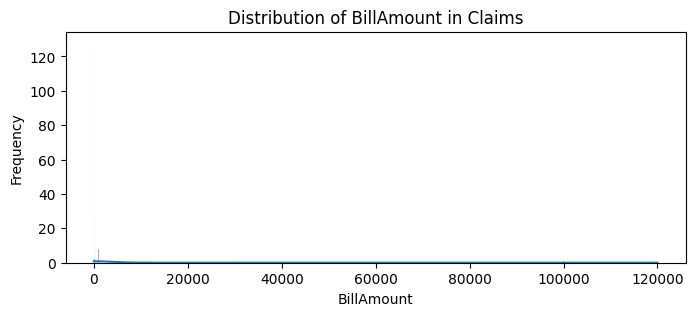

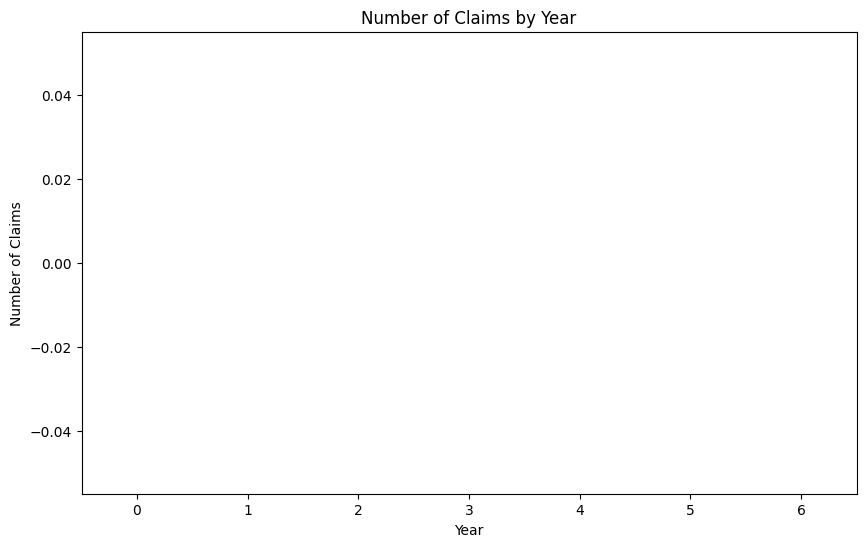

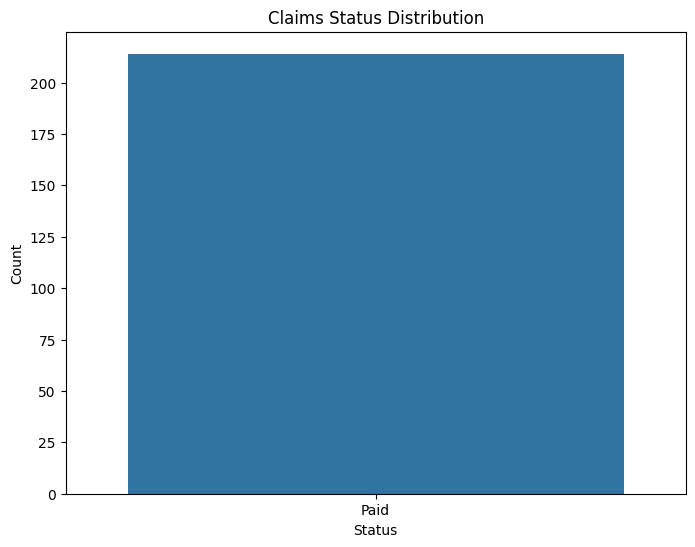

ValueError: List of boxplot statistics and `positions` values must have same the length

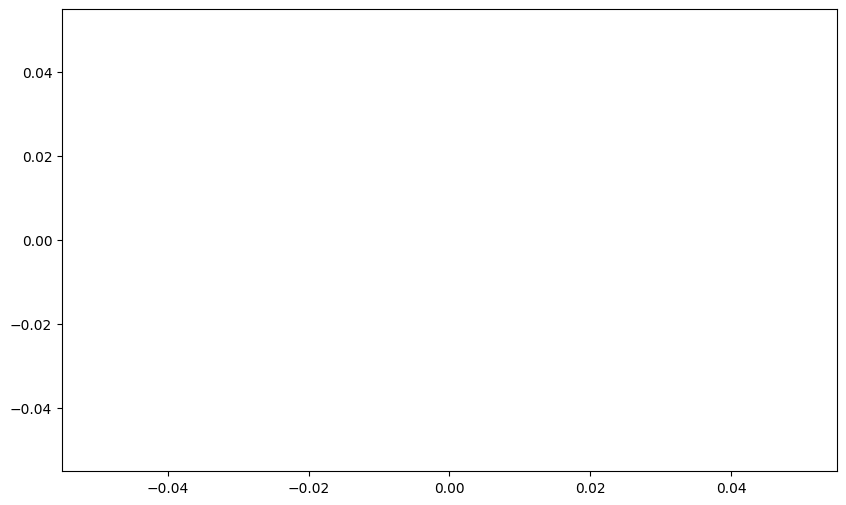

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Claims DataFrame
df_claims = pd.read_csv('database/Claims_Cleaned.csv')  # Replace with your cleaned Claims file path

# Display first few rows of the Claims data
print("Claims Data Preview:")
print(df_claims.head())

# General Info about the Claims DataFrame
print("\nClaims DataFrame Info:")
df_claims.info()

# Missing Values Analysis for Claims
print("\nMissing Values in Claims DataFrame:")
print(df_claims.isnull().sum())

# Descriptive Statistics for Claims Data
print("\nDescriptive Statistics for Claims DataFrame:")
print(df_claims.describe())

# Check unique values for categorical columns in Claims DataFrame
print("\nUnique Values in 'Status' Column of Claims DataFrame:")
print(df_claims['Status'].value_counts())

print("\nUnique Values in 'HAN' Column of Claims DataFrame:")
print(df_claims['HAN'].nunique())

# Visualizations

# Distribution of 'BillAmount' in Claims Data
plt.figure(figsize=(8, 6))
sns.histplot(df_claims['BillAmount'], kde=True)
plt.title('Distribution of BillAmount in Claims')
plt.xlabel('BillAmount')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'CreatedDate' in Claims Data (Year-wise)
df_claims['CreatedDate'] = pd.to_datetime(df_claims['CreatedDate'], errors='coerce')
df_claims['Year'] = df_claims['CreatedDate'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=df_claims, x='Year')
plt.title('Number of Claims by Year')
plt.xlabel('Year')
plt.ylabel('Number of Claims')
plt.show()

# Distribution of Claims Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df_claims, x='Status')
plt.title('Claims Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Relationship between BillAmount and Year in Claims
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_claims, x='Year', y='BillAmount')
plt.title('BillAmount Distribution by Year in Claims')
plt.xlabel('Year')
plt.ylabel('BillAmount')
plt.show()

# Relationship between BillAmount and HAN (if HAN is categorical or specific to a policy)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_claims, x='HAN', y='BillAmount')
plt.title('BillAmount Distribution by HAN in Claims')
plt.xlabel('HAN')
plt.ylabel('BillAmount')
plt.xticks(rotation=90)
plt.show()

# Visualizing Missing Values (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df_claims.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Claims Data')
plt.show()

# Visualizing the correlation matrix for Claims (if numerical columns are available)
plt.figure(figsize=(10, 6))
sns.heatmap(df_claims.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Claims Data')
plt.show()
